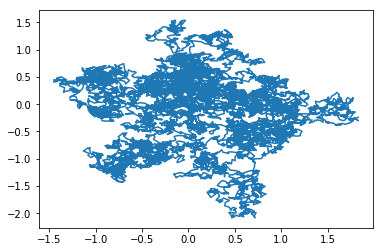

tensor([[-1.2986,  0.3280, -1.2069]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3075,  0.3094, -1.2360]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3096,  0.3054, -1.2488]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.2983,  0.3070, -1.2397]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3183,  0.2764, -1.2715]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3499,  0.3360, -1.2780]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3148,  0.3566, -1.2389]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan],
        [nan]], grad_fn=<CopySlices>)
tensor([[-1.3274,  0.4107, -1.2296]], grad_fn=<AddBackward0>)
tensor([[nan],
        [nan]

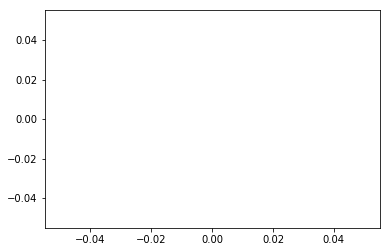

In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy 
import math
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(42)
p = torch.tensor([10,6,2],dtype=torch.float)
p1=torch.diag(p)
n=3
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
w1=torch.diag(w)
w_rec=torch.diag(w1)
w1_rec = w-w_rec
lr = 1e-3
n_epochs = 10
optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)

for epoch in range(n_epochs):
    z=torch.randn(1,n)
    Z=torch.zeros(T,n)
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z

    loss = ((Z@p1)**2).mean()
    loss.backward()       
    optimizer.step()
    optimizer.zero_grad()
    
    

plt.plot(Z[:,0].detach().numpy(), Z[:,1].detach().numpy())
plt.show()  




color=['b','c','k','g','w','m','r','y']
Z=torch.zeros(T,n)
z=torch.randn(1,n)
for a in range(8):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        print (z)
        V=torch.zeros(n,1)
        for i in range(n):
            V[i]=torch.var(z[:,i])
        print (V)
        plt.scatter(p,V.detach().numpy(),color=color[a])
    
plt.show()  



    
    
#plt.plot(p,V.detach().numpy(), 'r--', p, V2.detach().numpy(), 'bs', p, V.detach().numpy(), 'g^')
#plt.show()




